<a href="https://colab.research.google.com/github/levynlee/ESAA/blob/main/1216_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://wikidocs.net/57810

##**04. [ML 입문] - 로지스틱 회귀(Logistic Regression)**

###**04-01. 로지스틱 회귀(Logistic Regression)**

**(1) 이진 분류(Binary Classification)**

둘 중 하나를 결정하는 문제

** 로지스틱 회귀는 알고리즘의 이름은 회귀이지만 실제로는 분류 작업에 사용 할 수 있다.

**(2) 시그모이드 함수(Sigmoid function)**

로지스틱 회귀에 적합한 S자 형태로 그래프를 그려주는 함수

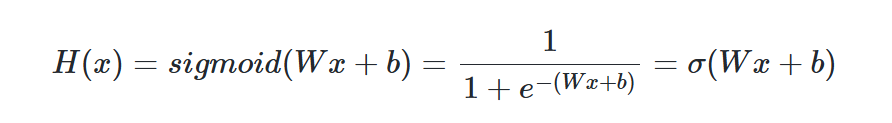

선형 회귀에서처럼 로지스틱 회귀에서도 최적의 W와 b를 찾는 것이 목표

In [6]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

In [7]:
def sigmoid(x): # 시그모이드 함수 정의
  return 1/(1+np.exp(-x))

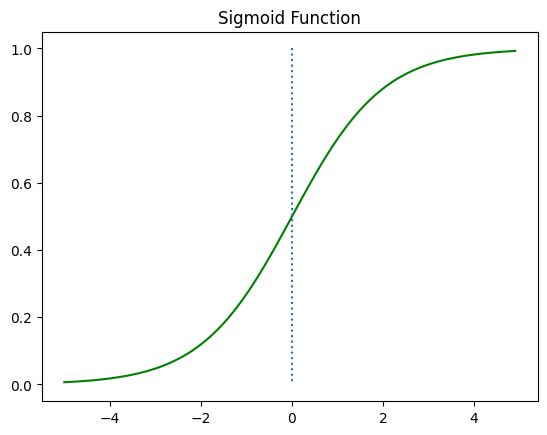

In [8]:
# W=1, b=0인 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

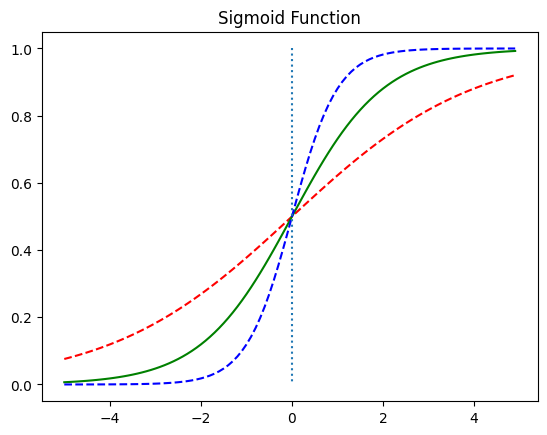

In [9]:
# W값의 변화에 따른 경사도의 변화 확인
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일 때
plt.plot(x, y2, 'g') # W의 값이 1일 때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일 때
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

W의 값이 커질수록 경사가 급해진다.

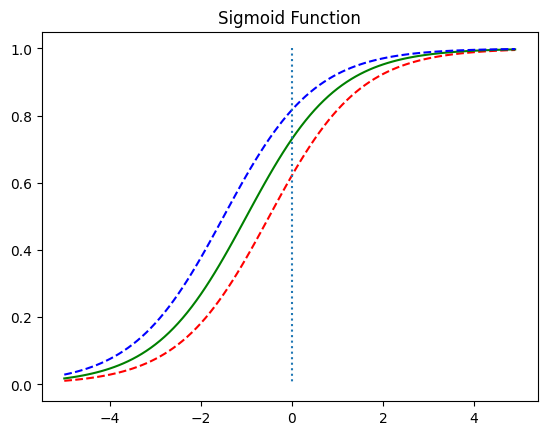

In [10]:
# b의 값에 따라서 그래프가 어떻게 변하는지 확인
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

b 값에 따라서 그래프가 좌, 우로 이동한다.

시그모이드 함수를 이용한 분류
- 시그모이드 함수는 입력값이 한없이 커지면 1에 수렴, 입력값이 한없이 작아지면 0에 수렴
- 시그모이드 함수의 출력값은 0과 1사이의 값을 가짐
- 임계값을 설정해서 분류 작업에 사용 가능: ex) 임계값을 0.5로 설정하고, 출력값이 0.5 이상이면 1, 0.5 이하면 0으로 판단

**(3) 비용 함수(Cost function)**

최적의 W와 b를 찾을 수 있는 비용 함수를 정의해야하는데, 선형 회귀에서 배운 비용 함수인 평균제곱오차(MSE)를 로지스틱 회귀의 비용 함수로 사용할 수 없다. 로지스틱 회귀의 시그모이드 함수를 MSE 식에 적용하여 경사 하강법을 사용할 경우 글로벌 미니멈이 아니라 로컬 미니멈에 빠지는 오류가 발생하기 쉽기 때문이다.  

따라서 시그모이드 함수의 특징을 잘 반영하는 로그 함수를 사용하여 비용함수를 다음과 같이 재정의한다.

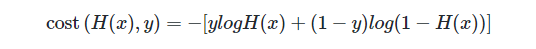

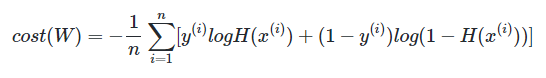

이 비용 함수에 대하여 경사 하강법을 수행하면서 최적의 가중치 W를 찾을 수 있다.

**(4) 파이토치로 로지스틱 회귀 구현하기**

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
torch.manual_seed(1)

In [14]:
# x_train과 y_train을 텐서로 선언
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [15]:
# x_train과 y_train의 크기 확인
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [16]:
# W와 b 선언
W = torch.zeros((2,1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [17]:
# 행렬 연산을 사용한 가설 식 설정
hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))

In [18]:
# 앞서 W와 b는 torch.zeros를 통해 전부 0으로 초기화된 상태
# 이 상태에서 예측값 출력
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [20]:
# torch.sigmoid를 사용하여 좀 더 간단히 구현한 가설식
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [21]:
# 예측값 출력
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [22]:
# 현재 예측값과 실제값 출력
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [24]:
# 하나의 샘플, 즉 하나의 원소에 대해서만 오차를 구하는 식
-(y_train[0]*torch.log(hypothesis[0])+
                       (1-y_train[0])*torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [25]:
# 모든 원소에 대해서 오차 구하기
losses = -(y_train*torch.log(hypothesis)+(1-y_train)*torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [26]:
# 전체 오차에 대한 평균
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


지금까지 비용 함수의 값을 직접 구현했는데, 파이토치에서는 로지스틱 회귀의 비용 함수를 이미 구현해서 제공하고 있다.

In [28]:
# torch.nn.functional as F
F.binary_cross_entropy(hypothesis, y_train) # F.binary_cross_entropy(예측값, 실제값)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [32]:
# 모델의 훈련 과정까지 추가한 전체 코드

x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

  # Cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)
  cost = -(y_train*torch.log(hypothesis)+
           (1-y_train)*torch.log(1-hypothesis)).mean()

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))


Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [33]:
# 훈련 후의 W, b (현재 W, b)를 그대로 입력으로 사용했을 대 제대로 예측하는지 확인
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [34]:
# 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [35]:
# 훈련이 된 후의 W, b 값 출력
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


###**04-02. nn.Module과 클래스로 구현하는 로지스틱 회귀**

**(1) 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현하기**

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [37]:
torch.manual_seed(1)

In [38]:
# 훈련 데이터를 텐서로 선언
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [39]:
# nn.Sequential()은 nn.Module 층을 차례로 쌓을 수 있게 함 (수식과 여러 함수들을 연결)
model = nn.Sequential(
    nn.Linear(2,1), # input_dim=2, output_dim=1
    nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [41]:
# 훈련 데이터를 넣어 예측값 확인 (현재의 W, b는 랜덤 초기화 상태)
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [42]:
# 경사 하강법을 사용하여 훈련

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

  # H(x) 계산
  hypothesis = model(x_train)

  # cost 계산
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도 계산
    print('Epoch {:4d}/{} Cost:{:.6f} Accuracy{:2.2f}%'.format(# 각 에포크마다 정확도 출력
                                                               epoch, nb_epochs, cost.item(),accuracy*100,
                                                               ))

Epoch    0/1000 Cost:0.539713 Accuracy83.33%
Epoch   10/1000 Cost:0.614853 Accuracy66.67%
Epoch   20/1000 Cost:0.441875 Accuracy66.67%
Epoch   30/1000 Cost:0.373145 Accuracy83.33%
Epoch   40/1000 Cost:0.316358 Accuracy83.33%
Epoch   50/1000 Cost:0.266094 Accuracy83.33%
Epoch   60/1000 Cost:0.220498 Accuracy100.00%
Epoch   70/1000 Cost:0.182095 Accuracy100.00%
Epoch   80/1000 Cost:0.157299 Accuracy100.00%
Epoch   90/1000 Cost:0.144091 Accuracy100.00%
Epoch  100/1000 Cost:0.134272 Accuracy100.00%
Epoch  110/1000 Cost:0.125769 Accuracy100.00%
Epoch  120/1000 Cost:0.118297 Accuracy100.00%
Epoch  130/1000 Cost:0.111680 Accuracy100.00%
Epoch  140/1000 Cost:0.105779 Accuracy100.00%
Epoch  150/1000 Cost:0.100483 Accuracy100.00%
Epoch  160/1000 Cost:0.095704 Accuracy100.00%
Epoch  170/1000 Cost:0.091369 Accuracy100.00%
Epoch  180/1000 Cost:0.087420 Accuracy100.00%
Epoch  190/1000 Cost:0.083806 Accuracy100.00%
Epoch  200/1000 Cost:0.080486 Accuracy100.00%
Epoch  210/1000 Cost:0.077425 Accuracy10

위 코드 설명: [이진 분류 모델을 학습시키는 과정]  
1. SGD 옵티마이저 설정  
2. 1000번 동안 모델 학습  
3. 각 반복에서 모델이 x_train을 사용해 예측 수행  
4. 이 예측값과 실제값인 y_train을 비교해 손실값 계산  
5. 손실을 줄이기 위해 모델의 파라미터 업데이트  
6. 학습 과정에서 매 10번째 반복마다 예측의 정확도를 계산하고 출력 --> 이 정확도는 모델이 얼마나 잘 학습되고 있는지를 평가하는 지표

In [44]:
# 기존의 훈련 데이터를 입력해 예측값 확인
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [45]:
# 훈련 후의 W, b 값 출력
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


**(2) 인공 신경망으로 표현되는 로지스틱 회귀**

**(3) 모델을 클래스로 구현하기**

In [46]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [47]:
# 앞선 로지스틱 회귀 모델을 클래스로 구현
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

- 클래스 형태의 모델은 nn.Module을 상속받음
- _ _ init _ _ ( )에서 모델의 구조와 동작을 정의하는 생성자 정의 --> 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출됨
- super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화됨
- forward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수, model 객체를 데이터와 함께 호출하면 자동으로 실행됨  

** H(x) 식에 입력 x로부터 예측된 y를 얻는 것이 forward 연산

**(4) 로지스틱 회귀 클래스로 구현하기**

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [49]:
torch.manual_seed(1)

In [50]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [51]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

model = BinaryClassifier()

In [52]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

  # H(x) 계산
  hypothesis = model(x_train)

  # cost 계산
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도 계산
    print('Epoch {:4d}/{} Cost:{:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도 출력
                                                                epoch, nb_epochs, cost.item(), accuracy*100,
                                                                 ))

Epoch    0/1000 Cost:0.539713 Accuracy 83.33%
Epoch   10/1000 Cost:0.614853 Accuracy 66.67%
Epoch   20/1000 Cost:0.441875 Accuracy 66.67%
Epoch   30/1000 Cost:0.373145 Accuracy 83.33%
Epoch   40/1000 Cost:0.316358 Accuracy 83.33%
Epoch   50/1000 Cost:0.266094 Accuracy 83.33%
Epoch   60/1000 Cost:0.220498 Accuracy 100.00%
Epoch   70/1000 Cost:0.182095 Accuracy 100.00%
Epoch   80/1000 Cost:0.157299 Accuracy 100.00%
Epoch   90/1000 Cost:0.144091 Accuracy 100.00%
Epoch  100/1000 Cost:0.134272 Accuracy 100.00%
Epoch  110/1000 Cost:0.125769 Accuracy 100.00%
Epoch  120/1000 Cost:0.118297 Accuracy 100.00%
Epoch  130/1000 Cost:0.111680 Accuracy 100.00%
Epoch  140/1000 Cost:0.105779 Accuracy 100.00%
Epoch  150/1000 Cost:0.100483 Accuracy 100.00%
Epoch  160/1000 Cost:0.095704 Accuracy 100.00%
Epoch  170/1000 Cost:0.091369 Accuracy 100.00%
Epoch  180/1000 Cost:0.087420 Accuracy 100.00%
Epoch  190/1000 Cost:0.083806 Accuracy 100.00%
Epoch  200/1000 Cost:0.080486 Accuracy 100.00%
Epoch  210/1000 Cos

##**05. [ML 입문] - 소프트맥스 회귀(Softmax Regression)**

소프트맥스 회귀: 3개 이상의 선택지로부터 1개를 선택하는 문제인 다중 클래스 분류를 풀기 위한 회귀

###**05-01. 원-핫 인코딩(One-Hot Encoding)**

**(1) 원-핫 인코딩이란?**

원-핫 인코딩: 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법  

원-핫 벡터: 원-핫 인코딩으로 표현된 벡터

**(2) 원-핫 벡터의 무작위성**

각 클래스 간의 관계가 균등한 경우, 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 클래스의 성질을 보다 잘 표현한다. 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일하다. 즉, 원-핫 벡터는 각 클래스의 포현 방법이 무작위성을 가진다는 점을 표현할 수 있다.  

원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 한다.

###**05-02. 소프트맥스 회귀(Softmax Regression) 이해하기**

**(1) 다중 클래스 분류(Multi-class Classification)**

세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류라고 한다.

로지스틱 회귀
- 가설: H(x) = sigmoid(Wx + B)   

소프트맥스 회귀
- 가설: H(x) = softmax(Wx + B)
- 각 클래스, 즉 각 선택지마다 소수 확률을 할당하며, 이때 총 확률의 합은 1

**(2) 소프트맥스 함수**

분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다.

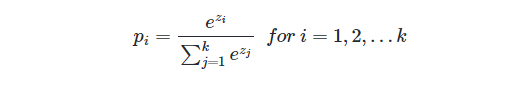

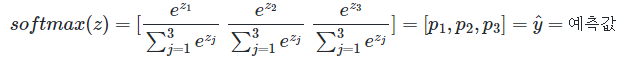

**(3) 붓꽃 품종 분류하기 행렬 연산으로 이해하기**

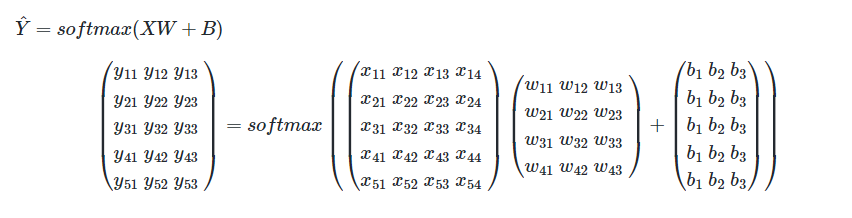

**(4) 비용함수**

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용한다.

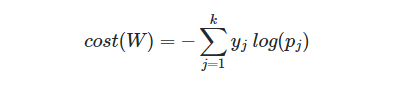

** 소프트맥스 함수의 최종 비용 함수에서 k가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같다.

###**05-03. 소프트맥스 회귀 다양한 방법으로 구현하기**

**(1) 소프트맥스 회귀의 비용 함수 구현**

In [53]:
import torch
import torch.nn.functional as F

In [54]:
torch.manual_seed(1)

**파이토치로 소프트맥스의 비용 함수 구현하기 (로우-레벨)**

In [55]:
# 3개의 원소를 가진 벡터 텐서 정의
z = torch.FloatTensor([1,2,3])

In [57]:
# 위 텐서를 소프트맥스 함수의 입력으로 사용, 결과 확인
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [58]:
# 출력된 원소들의 합이 1인지 확인
hypothesis.sum()

tensor(1.)

In [59]:
# 임의의 3 x 5 행렬의 크기를 가진 텐서
z = torch.rand(3, 5, requires_grad=True)

In [60]:
# 이 텐서에 소프트맥스 함수 적용
hypothesis = F.softmax(z, dim=1) # 각 샘플에 대해 소프트맥스 함수를 적용해야 하므로 두 번재 차원에 대해서 소프트맥스 함수를 적용한다는 의미에서 dim=1
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [61]:
# 각 샘플에 대한 임의의 레이블
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [62]:
# 모든 원소가 0의 값을 가진 3x5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)

# y.unsqueeze(1): (3,)의 크기를 가졌던 y 텐서는 3x1 텐서가 됨
# scatter의 첫 번째 인자로 dim=1에 대해서 수행하라고 알려줌
# scatter의 두 번재 인자로 y_unsqueeze(1)이 알려주는 위치에 숫자 1을 넣도록 함
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [63]:
# y.unsqueeze(1): (3,)의 크기를 가졌던 y 텐서는 3x1 텐서가 됨
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


In [64]:
# 연산 뒤에 _를 붙이면 In-place Operation(덮어쓰기 연산)
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [65]:
# 소프트맥스 회귀의 비용 함수 구현
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


**파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)**

F.softmax() + torch.log() = F.log_softmax()

In [66]:
# Low Level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [67]:
# High Level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

F.log_softmax() + F.nll_loss() = F.cross_entropy()

In [68]:
# Low Level
# 첫 번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [69]:
# 두 번째 수식
(y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [70]:
# High Level
# 세 번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y) # nll은 Negative Log Likelihood의 약자

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [71]:
# 네 번째 수식
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

** F.cross_entropy는 비용 함수에 소프트맥스 함수까지 포함하고 있음을 기억!

**(2) 소프트맥스 회귀 구현하기**

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [73]:
torch.manual_seed(1)

In [76]:
# 훈련 데이터와 레이블을 텐서로 선언
x_train = [[1,2,1,1],
           [2,1,3,2],
           [3,1,3,4],
           [4,1,5,5],
           [1,7,5,5],
           [1,2,5,6],
           [1,6,6,6],
           [1,7,7,7]]
y_train = [2,2,2,1,1,1,0,0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

x_train의 각 샘플은 4개의 특성을 가지고 있으며, 총 8개의 샘플 존재  

y_train은 각 샘플에 대한 레이블인데, 0,1,2의 값을 가지는 것으로 보아 총 3개의 클래스 존재

**소프트맥스 회귀 구현 (로우-레벨)**

In [77]:
# x_train, y_train의 크기 확인
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


x_train의 크기는 8x4, y_train의 크기는 8x1.  
그런데 최종 사용할 레이블은 y_train에서 원-핫 인코딩을 한 결과여야 함.  
클래스의 개수가 3이므로 y_train에 원-핫 인코딩한 결과는 8x3의 개수를 가져야 함.

In [78]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [79]:
# 모델 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros((1,3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=0.1)

In [80]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # 가설
  hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

  # 비용 함수
  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.622999
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467661
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285072
Epoch 1000/1000 Cost: 0.248155


**소프트맥스 회귀 구현 (하이-레벨)**

In [82]:
# 모델 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros((1,3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):

  # Cost 계산
  z = x_train.matmul(W) + b
  cost = F.cross_entropy(z, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


**소프트맥스 회귀 nn.Module로 구현**

In [83]:
# 모델 선언 및 초기화
# 4개의 특성을 가지고 3개의 클래스로 분류
# output_dim=1이었던 선형 회귀 때와 달리 output_dim은 클래스의 개수여야 함: output_dim=3
model = nn.Linear(4,3) # input_dim=4, output_dim=3

In [84]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.cross_entropy(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch: {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch:    0/1000 Cost: 1.616785
Epoch:  100/1000 Cost: 0.658891
Epoch:  200/1000 Cost: 0.573443
Epoch:  300/1000 Cost: 0.518151
Epoch:  400/1000 Cost: 0.473265
Epoch:  500/1000 Cost: 0.433516
Epoch:  600/1000 Cost: 0.396563
Epoch:  700/1000 Cost: 0.360914
Epoch:  800/1000 Cost: 0.325392
Epoch:  900/1000 Cost: 0.289178
Epoch: 1000/1000 Cost: 0.254148


**소프트맥스 회귀 클래스로 구현**

In [85]:
# SoftmaxClassifierModel 클래스 정의 (PyTorch의 nn.Module을 상속받아 정의된 신경망 모델)
# 클래스의 init 메서드에서 nn.Linear를 사용해 입력 차원이 4이고 출력 차원이 3인 선형 계층 정의
# forward 메서드는 모델의 순전파(forward) 과정을 정의
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3) # Output이 3!

  def forward(self, x):
    return self.linear(x)

In [86]:
# 모델 인스턴스 생성, SGD 옵티마이저 설정
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [88]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.cross_entropy(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.251128
Epoch  100/1000 Cost: 0.231983
Epoch  200/1000 Cost: 0.220758
Epoch  300/1000 Cost: 0.210539
Epoch  400/1000 Cost: 0.201189
Epoch  500/1000 Cost: 0.192602
Epoch  600/1000 Cost: 0.184691
Epoch  700/1000 Cost: 0.177379
Epoch  800/1000 Cost: 0.170602
Epoch  900/1000 Cost: 0.164305
Epoch 1000/1000 Cost: 0.158440


###**05-04. 소프트맥스 회귀로 MNIST 데이터 분류하기**

**(1) MNIST 데이터 이해하기**

MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋이다. 총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어 있다. 레이블은 0부터 9까지 총 10개이다. MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제이다.  

각각의 이미지는 28 픽셀 x 28 픽셀이다. 28 x 28 = 784 픽셀이므로, 각 이미지를 총 784 개의 원소를 가진 벡터로 만들어준다.

**(2) 토치비전(torchvision) 소개하기**

torchvision은 유명한 데이터셋들, 이미 구현되어 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지다.

**(3) 분류기 구현을 위한 사전 설정**

In [89]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [90]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용 가능하면 True, 아니라면 False 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


구글의 Colab에서 '런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU'를 선택하면 USE_CUDA의 값이 True가 되면서 '다음 기기로 학습합니다: cuda'라는 출력이 나온다. (GPU로 연산)
  
반면 '하드웨어 가속기 > None'을 선택하면 USE_CUDA의 값이 False가 되면서 '다음 기기로 학습합니다: cpu'라는 출력이 나온다. (CPU로 연산)

In [91]:
# 랜덤 시드 고정 for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [92]:
# 하이퍼 파라미터를 변수로 두기
training_epochs = 15
batch_size = 100

**(4) MNIST 분류기 구현하기**

In [93]:
# MNIST dataset

# 첫 번째 인자 root는 MNIST 데이터를 다운로드 받을 경로
# 두 번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받고, False를 주면 테스트 데이터를 리턴받음
# 세 번재 인자 transform은 현재 데이터를 파이토치 텐서로 변환
# 네 번째 인자 download는 해당 경로에 MNIST가 없다면 다운로드 받겠다는 의미
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 54.9MB/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.88MB/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.1MB/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.77MB/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [95]:
# dataset loader

# 첫 번째 인자 dataset: 로드할 대상
# 두 번째 인자 batch_size: 배치 크기
# 세 번째 인자 shuffle: 매 에포크마다 미니 배치를 셔플할 것인지의 여부
# 네 번째 인자 drop_last: 마지막 배치를 버릴 것인지의 여부
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)

** drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해보자. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남는다. 이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있다. 마지막 배치를 버리려면 drop_last=True를 해주면 된다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아준다.

In [97]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)
# to() 함수는 연산을 어디서 수행할지 정한다. 즉, 모델의 매개변수를 지정한 장치의 메모리로 보낸다. cpu를 사용할 경우에는 필요가 없지만 gpu를 사용하려면 to('cuda')를 해 줄 필요가 있다.
# bias는 편향 b를 사용할 것인지를 나타낸다.

In [98]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

** torch.nn.functional.cross_entropy()와 torch.nn.CrossEntropyLoss() 모두 파이토치에서 제공하는 크로스 엔트로피 함수로, 둘 다 소프트맥스 함수를 포함한다.

In [100]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
    X = X.view(-1, 28*28).to(device)
    # 레이블은 원-핫 인코딩이 된 상태가 아니라 0~9의 정수
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.359200478
Epoch: 0002 cost = 0.331210256
Epoch: 0003 cost = 0.316642910
Epoch: 0004 cost = 0.306912154
Epoch: 0005 cost = 0.300341636
Epoch: 0006 cost = 0.295203745
Epoch: 0007 cost = 0.290808409
Epoch: 0008 cost = 0.287419230
Epoch: 0009 cost = 0.284378767
Epoch: 0010 cost = 0.281997472
Epoch: 0011 cost = 0.279780537
Epoch: 0012 cost = 0.277854115
Epoch: 0013 cost = 0.276023209
Epoch: 0014 cost = 0.274494976
Epoch: 0015 cost = 0.272993028
Learning finished


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy 0.8873999714851379
Label:  8
Prediction:  3


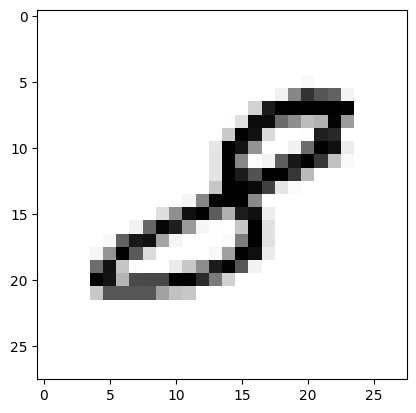

In [101]:
# 테스트 데이터를 사용하여 모델 테스트
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 X
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy', accuracy.item())

  # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()

- 평가 모드 활성화: with torch.no_grad(): 블록 내에서는 기울기 계산을 하지 않도록 설정. 이는 모델을 테스트할 때 필요 없는 기울기 계산을 방지하여 메모리와 연산 효율을 높인다.

- 테스트 데이터 준비: mnist_test.test_data는 테스트 데이터셋의 이미지 데이터를 포함하며, view(-1, 28 * 28)를 통해 28x28 크기의 이미지를 일렬로 펼쳐 (1, 784) 형태로 변환한다. .float() 메서드를 통해 데이터를 실수형으로 변환하고, .to(device)로 모델과 동일한 장치(CPU나 GPU)에 배치한다. mnist_test.test_labels는 해당 데이터셋의 레이블(정답)을 포함한다.

- 모델 예측 및 정확도 계산: linear(X_test)를 통해 테스트 데이터에 대한 모델의 예측을 수행한다. torch.argmax(prediction, 1)은 각 이미지에 대해 예측된 클래스 레이블을 반환하며, 이 값이 실제 레이블 Y_test와 동일한지 여부를 correct_prediction 변수에 저장한다. 이후, correct_prediction.float().mean()를 통해 전체 테스트 데이터셋에 대한 정확도를 계산하고 출력한다.

- 임의의 테스트 샘플 예측: random.randint(0, len(mnist_test) - 1)을 사용하여 테스트 데이터셋에서 임의의 샘플을 선택한다. 선택된 이미지를 모델에 입력하여 예측하고, 실제 레이블(Y_single_data)과 모델의 예측 결과(single_prediction)를 출력한다.

- 이미지 시각화: plt.imshow()를 사용하여 선택된 이미지를 시각적으로 보여준다. cmap='Greys'는 이미지를 회색조로 표시하고, interpolation='nearest'는 이미지를 확대할 때 보간을 최소화하여 원본의 형태를 유지한다.